In [14]:
import pandas as pd
import numpy as np
from os.path import dirname, abspath
import matplotlib
from matplotlib import pylab as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest


In [15]:
d = dirname(dirname(abspath("EDA.ipynb")))
df_preprocessed = pd.read_csv(d + '/data/Preprocessed_Citi_Bike_Data.csv')

df = pd.read_csv(d + '/data/Semi_processed_data.csv')

df.head()


,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,Start Time,End Time
0,142,Exchange Place,40.716247,-74.033459,Harborside,40.719252,-74.034234,Subscriber,1963.0,1,56100.518,56242.572
1,223,Exchange Place,40.716247,-74.033459,Grand St,40.715178,-74.037683,Subscriber,1992.0,2,61245.326,61468.986
2,106,Exchange Place,40.716247,-74.033459,Paulus Hook,40.714145,-74.033552,Subscriber,1960.0,1,61679.762,61785.876
3,370,Exchange Place,40.716247,-74.033459,Newark Ave,40.721525,-74.046305,Subscriber,1976.0,1,61769.646,62140.091
4,315,Exchange Place,40.716247,-74.033459,Manila & 1st,40.721651,-74.042884,Subscriber,1980.0,1,62391.685,62707.576


In [16]:
cat_ftrs = ['start station name', 'end station name', 'gender']
cont_ftrs = ['tripduration','start station longitude', 'end station longitude','start station latitude',
             'end station latitude','Start Time','End Time','birth year']
label = ['usertype']


In [17]:
print(df_preprocessed.shape)
df_preprocessed.head()

(381995, 254)


,usertype,x0_5 Corners Library,x0_Astor Place,x0_Baldwin at Montgomery,x0_Bayside Park,x0_Bergen Ave,x0_Bethune Center,x0_Brunswick & 6th,x0_Brunswick St,x0_Christ Hospital,...,x0_1,x0_2,birth year,Start Time,End Time,tripduration,end station latitude,start station latitude,end station longitude,start station longitude
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-1.718326,0.280763,0.264779,-0.067222,0.029851,-0.886967,-0.027368,1.178391
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.105304,0.559398,0.546208,-0.057472,0.026735,-0.886967,-0.028819,1.178391
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-2.010425,0.582926,0.563272,-0.071555,0.025945,-0.886967,-0.027081,1.178391
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.452561,0.587794,0.582345,-0.039778,0.031589,-0.886967,-0.032445,1.178391
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.063095,0.621483,0.612903,-0.046398,0.031685,-0.886967,-0.031007,1.178391


**NOTES**
* f test for most important ones
* EDA on these defined features
* do we have to run any MCAR trye tests? for missing data
    ** .01119 percent of my data was missing
    ** 751299/759807 - so i dropped the missing rows
    
* i also dropped the columns.... explain way


Text(0.5, 0, 'User Type')

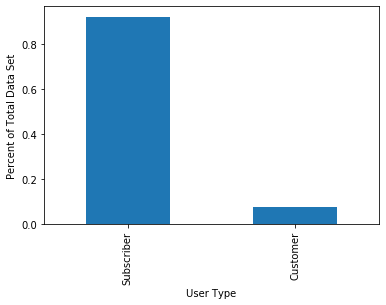

In [18]:
#****************USE THIS ONE****************************
pd.value_counts(df['usertype'],normalize=True).plot.bar() 
plt.ylabel('Percent of Total Data Set')
plt.xlabel('User Type')

#unballanced dataset...


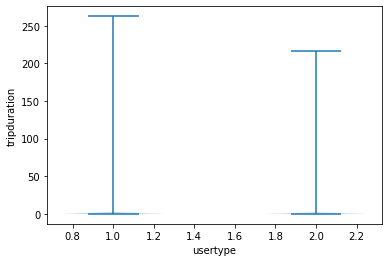

([array([6.87579158e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
  array([6.87579158e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00])],
 array([6.1000000e+01, 1.4549880e+05, 2.9093660e+05, 4.3637440e+05,
        5.8181220e+05, 7.2725000e+05, 8.7268780e+05, 1.0181256e+06,
        1.1635634e+06, 1.3090012e+06, 1.4544390e+06, 1.5998768e+06,
        1.7453146e+06, 1.8907524e+06, 2.0361902e+06, 2.1816280e+06]),
 <a list of 2 Lists of Patches objects>)

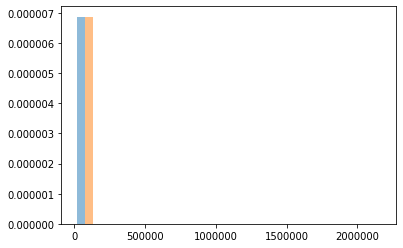

In [19]:
# violin plot

dataset = [df_preprocessed[df_preprocessed['usertype']==0.0]['tripduration'].values,
            df_preprocessed[df_preprocessed['usertype']==1.0]['tripduration'].values]
                                        
                                        
plt.violinplot(dataset = dataset)
plt.xlabel('usertype')
plt.ylabel('tripduration')
plt.show()

plt.hist(dataset,alpha=0.5, label=c,bins=15,density=True, range=bin_range)



In [20]:
#continuous features

#****************USE start time and end time****************************

categories = df_preprocessed["['usertype']"].unique()

for feat in cont_ftrs:
    bin_range = (df_preprocessed[feat].min(),df_preprocessed[feat].max())
    for c in categories:
        plt.hist(df_preprocessed[df_preprocessed["['usertype']"]==c][feat],alpha=0.5,
                 label=c,bins=15,density=True, range=bin_range)
    plt.legend()
    plt.ylabel('pdf')
    plt.xlabel(feat)
    plt.tight_layout()
    plt.show()


KeyError: "['usertype']"

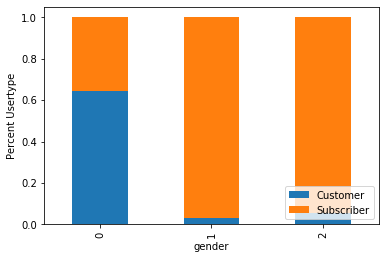

In [21]:
#categorical features

#****************USE THIS ONE****************************

count_matrix = df.groupby(["gender",'usertype']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind = 'bar', stacked = True)
plt.ylabel('Percent Usertype')
plt.legend(loc=4)
plt.show()


    

In [22]:
pd.value_counts(df["tripduration"])

246       2124
244       2107
241       2073
238       2069
251       2066
239       2066
256       2057
243       2045
240       2043
235       2036
242       2031
263       2025
231       2021
233       2015
229       2011
247       2010
254       2010
248       2008
249       2003
250       2003
260       2001
224       1999
259       1995
245       1995
252       1994
220       1987
232       1981
237       1980
223       1980
222       1979
          ... 
241624       1
69876        1
10963        1
6063         1
459830       1
15569        1
5332         1
7893         1
16298        1
95992        1
14544        1
3796         1
11984        1
10667        1
339569       1
10449        1
12498        1
5548         1
13010        1
5036         1
11179        1
14034        1
9425         1
19367        1
6573         1
8913         1
4524         1
6870         1
48322        1
7865         1
Name: tripduration, Length: 8971, dtype: int64

In [23]:
pd.value_counts(df_preprocessed["tripduration"])

-0.053500     1039
-0.054102     1035
-0.054944     1035
-0.053741     1034
-0.055305     1030
-0.055666     1022
-0.056750     1015
-0.054342     1014
-0.057111     1011
-0.055065     1008
-0.056870     1002
-0.057833     1001
-0.057592     1000
-0.055546      998
-0.054583      998
-0.054824      990
-0.055185      990
-0.052417      988
-0.054703      984
-0.056268      982
-0.053379      982
-0.054463      975
-0.055426      974
-0.054222      973
-0.057352      972
-0.052657      971
-0.056389      966
-0.052778      964
-0.057472      963
-0.053861      963
              ... 
 7.356314        1
 0.862616        1
 0.506088        1
 12.918849       1
 0.656788        1
 1.536432        1
 2.129843        1
 1.664864        1
 0.684713        1
 0.599493        1
 0.557966        1
 0.388730        1
 4.344602        1
 1.533182        1
 0.627900        1
 0.440367        1
 0.416294        1
 2.857464        1
 0.751397        1
 0.659797        1
 1.555691        1
 18.136412  

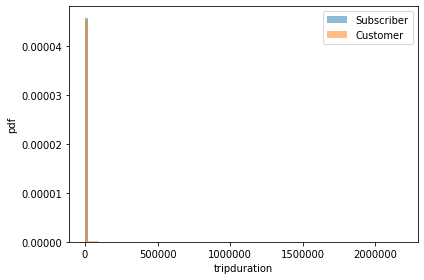

In [24]:
categories = df['usertype'].unique()
bin_range = (df['tripduration'].min(),df['tripduration'].max())
for c in categories:
    plt.hist(df[df["usertype"]==c]['tripduration'],alpha=0.5,
                 label=c,bins=100,density=True, range=bin_range)
plt.legend()
plt.ylabel('pdf')
plt.xlabel('tripduration')
plt.tight_layout()
plt.show()

In [25]:
#**********Use this***********************

cont = ['tripduration','Start Time','End Time','birth year']

pd.plotting.scatter_matrix(df_preprocessed[cont],c = df_preprocessed["['usertype']"], figsize = (15, 15),
                        marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

KeyError: "['usertype']"

In [26]:
from sklearn.decomposition import PCA

#PCA
y = df_preprocessed["['usertype']"]
df_pca = df_preprocessed.drop(columns = "['usertype']")

pca = PCA(n_components=df_pca.shape[1])
X_pca = pca.fit_transform(df_pca)


KeyError: "['usertype']"

In [27]:
#first 5 components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(df_pca)

for i in range(5):
    print(X_pca_2[i])

NameError: name 'df_pca' is not defined

In [28]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

NameError: name 'X_pca' is not defined

In [29]:
print(np.cumsum(pca.explained_variance_ratio_))

NameError: name 'pca' is not defined

In [30]:
#*******use this one?***************
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nr. components')
plt.ylabel('variance explained')
plt.show()

NameError: name 'pca' is not defined

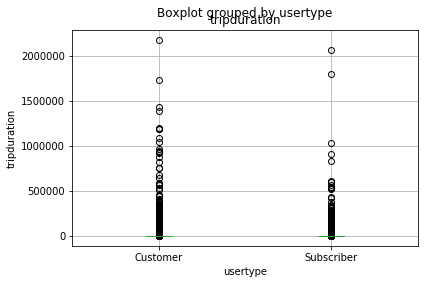

In [31]:
df[['tripduration','usertype']].boxplot(by='usertype')
plt.xlabel('usertype')
plt.ylabel('tripduration')
plt.show()

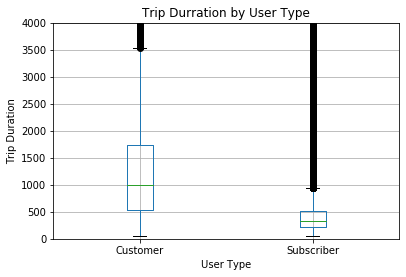

In [32]:
#*****USE THIS ONE ******************
df[['tripduration','usertype']].boxplot(by='usertype')
plt.title('Trip Durration by User Type')
plt.ylim((0,4_000))
plt.suptitle('')
plt.xlabel('User Type')
plt.ylabel('Trip Duration')
plt.show()

In [33]:
df_preprocessed[['tripduration',"['usertype']"]].boxplot(by="['usertype']")
plt.title('Trip Durration by User Type')
plt.suptitle('')
plt.xlabel('User Type')
plt.ylabel('Trip Duration')
plt.show()

KeyError: '["[\'usertype\']"] not in index'

In [34]:
df_preprocessed[['tripduration',"['usertype']"]].boxplot(by="['usertype']")
plt.title('Trip Durration by User Type')
plt.ylim((-0.25,0.5))
plt.suptitle('')
plt.xlabel('User Type')
plt.ylabel('Trip Duration')
plt.show()

KeyError: '["[\'usertype\']"] not in index'

In [35]:
categories = df_preprocessed["['usertype']"].unique()

bin_range = (df_preprocessed['tripduration'].min(),1.5)
for c in categories:
    plt.hist(df_preprocessed[df_preprocessed["['usertype']"]==c]['tripduration'],alpha=0.5,
            label=c,bins=100,density=True, range=bin_range)
plt.ylabel('PDF')
plt.xlabel('Trip Durration')
plt.tight_layout()
plt.show()

KeyError: "['usertype']"

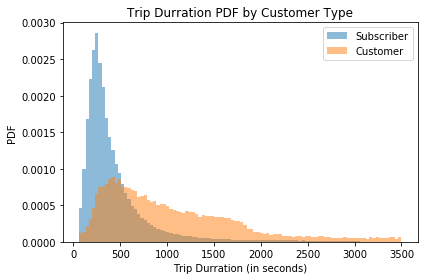

In [36]:
#*****USE THIS ONE ******************

categories = df['usertype'].unique()

bin_range = (df['tripduration'].min(),3500)
for c in categories:
    plt.hist(df[df['usertype']==c]['tripduration'],alpha=0.5,
            label=c,bins=100,density=True, range=bin_range)
plt.title('Trip Durration PDF by Customer Type')
plt.legend()
plt.ylabel('PDF')
plt.xlabel('Trip Durration (in seconds)')
plt.tight_layout()
plt.savefig(d+'/figures/trip_durr_by_custtype_hist',dpi = 300)


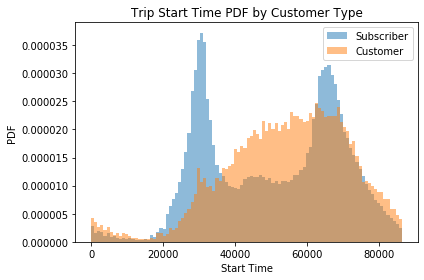

In [28]:
#*****USE THIS ONE ****************** USE not preprocessed data
categories = df['usertype'].unique()

bin_range = (df['Start Time'].min(),df['Start Time'].max())
for c in categories:
    plt.hist(df[df['usertype']==c]['Start Time'],alpha=0.5,
            label=c,bins=100,density=True, range=bin_range)
plt.title('Trip Start Time PDF by Customer Type')
plt.legend()
plt.ylabel('PDF')
plt.xlabel('Start Time')
plt.tight_layout()
plt.savefig(d+'/figures/start_time_by_custtype_hist',dpi = 300)
plt.show()

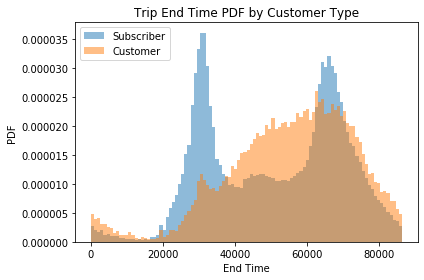

In [29]:
#*****USE THIS ONE ****************** USE not preprocessed data
categories = df['usertype'].unique()

bin_range = (df['End Time'].min(),df['End Time'].max())
for c in categories:
    plt.hist(df[df['usertype']==c]['End Time'],alpha=0.5,
            label=c,bins=100,density=True, range=bin_range)
plt.title('Trip End Time PDF by Customer Type')
plt.legend()
plt.ylabel('PDF')
plt.xlabel('End Time')
plt.tight_layout()
plt.savefig(d+'/figures/end_time_by_custtype_hist',dpi = 300)
plt.show()

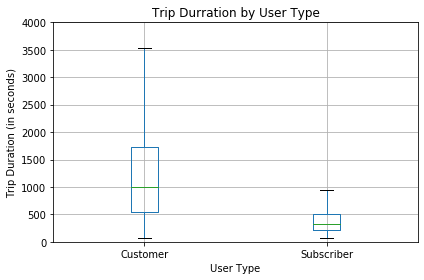

In [35]:
#*****USE THIS ONE ******************
df[['tripduration','usertype']].boxplot(by='usertype',showfliers = False)
plt.title('Trip Durration by User Type')
plt.ylim((0,4_000))
plt.suptitle('')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (in seconds)')
plt.tight_layout()
plt.savefig(d+'/figures/trip_durr_by_custtype_boxplot',dpi = 300)
plt.show()


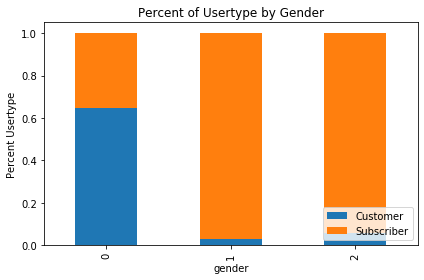

In [30]:
#categorical features

#****************USE THIS ONE**************************** another bar before to show the numbers?

count_matrix = df.groupby(["gender",'usertype']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind = 'bar', stacked = True)
plt.title('Percent of Usertype by Gender')
plt.ylabel('Percent Usertype')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig(d+'/figures/gender_by_custtype_norm_stackbar',dpi = 300)
plt.show()



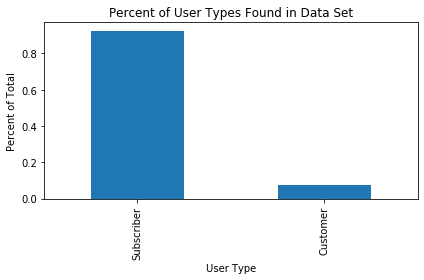

In [31]:
#****************USE THIS ONE****************************
pd.value_counts(df['usertype'],normalize=True).plot.bar() 
plt.title('Percent of User Types Found in Data Set')
plt.ylabel('Percent of Total')
plt.xlabel('User Type')
plt.tight_layout()
plt.savefig(d+'/figures/balanceofData_bar',dpi = 300)
#unballanced dataset...



In [37]:
#*******use this one?***************
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.tight_layout()
plt.savefig(d+'/figures/var_explained_line',dpi = 300)
plt.show()

NameError: name 'pca' is not defined

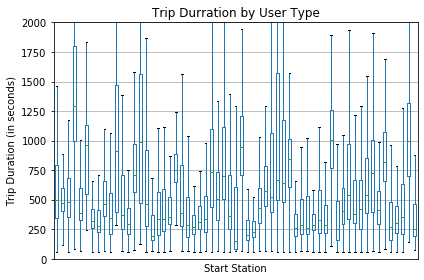

In [38]:
#*****USE THIS ONE ****************** trip durration 
df[['tripduration','start station name']].boxplot(by='start station name',showfliers = False)
plt.title('Trip Durration by User Type')
plt.ylim((0,2_000))
plt.xticks(np.arange(len(df['start station name'].unique()))[::1000],sorted(df['start station name'].unique())[::1000])
plt.suptitle('')
plt.xlabel('Start Station')
plt.ylabel('Trip Duration (in seconds)')
plt.tight_layout()
plt.savefig(d+'/figures/trip_durr_by_start_station_boxplot',dpi = 300)
plt.show()

